 # Fantano rating from 2010-2022
  #### fantano (theneedledrop) is a music critic that discuss music and albums and rate them out of ten


In [10]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load the dataset
data_url = 'https://drive.google.com/uc?export=download&id=1fGoz7iB2fIkGvE9fDPes4FwXkauLgFEX'
df = pd.read_csv(data_url)

In [12]:
df.shape #data structure

(3024, 10)

In [13]:
df.head() # first five rows of the dataset

,Unnamed: 0,spotify_id,youtube_id,project_name,artist,project_type,tracks,project_art,year,rating
0,0,1B5Lwt0D1ZetRreaCBYobP,GMKfsj1fg5g,all day,girl talk,album,14.0,https://i.scdn.co/image/ab67616d000048510192ca...,2008.0,8.0
1,1,20r762YmB5HeofjMCiPMLv,Jo4S2qlQGs0,my beautiful dark twisted fantasy,kanye west,album,13.0,https://i.scdn.co/image/ab67616d00004851d9194a...,2010.0,6.0
2,2,35tQBmq1RblVUzAvfsw5uO,AyzpDXRVbwA,scary monsters and nice sprites,skrillex,ep,9.0,https://i.scdn.co/image/ab67616d0000485181cfaf...,2010.0,7.0
3,3,0X7WyEKdm5afGj1fmD7Blx,lVj-lS3bfUc,broken bells,broken bells,ep,10.0,https://i.scdn.co/image/ab67616d00004851e198b6...,2010.0,5.0
4,4,5zi7WsKlIiUXv09tbGLKsE,_2RPGAA6p4E,bastard,"tyler, the creator",album,12.0,https://i.scdn.co/image/ab67616d00004851700588...,2019.0,7.0


In [14]:
df = df.drop(['Unnamed: 0' , 'spotify_id','youtube_id' , 'project_art'] , axis = 1) # removing the unnecessary columns

In [15]:
df.head() # check the dataset after removing the columns

,project_name,artist,project_type,tracks,year,rating
0,all day,girl talk,album,14.0,2008.0,8.0
1,my beautiful dark twisted fantasy,kanye west,album,13.0,2010.0,6.0
2,scary monsters and nice sprites,skrillex,ep,9.0,2010.0,7.0
3,broken bells,broken bells,ep,10.0,2010.0,5.0
4,bastard,"tyler, the creator",album,12.0,2019.0,7.0


In [16]:
df.tail() # the 5 last rows of dataset

,project_name,artist,project_type,tracks,year,rating
3019,hiss,wormrot,album,21.0,2022.0,8.0
3020,big time,angel olsen,album,10.0,2022.0,7.0
3021,aethiopes,billy woods,album,13.0,2022.0,8.0
3022,jodeki,tricot,album,12.0,2020.0,7.0
3023,motomami,rosalía,album,16.0,2022.0,7.0


In [17]:
df.sample(5) # sample size of 5

,project_name,artist,project_type,tracks,year,rating
2306,no dream,jeff rosenstock,album,13.0,2020.0,8.0
2863,reset,panda bear & sonic boom,album,9.0,2022.0,6.0
2111,hot pink,doja cat,album,12.0,2019.0,4.0
2569,vince staples,vince staples,album,10.0,2021.0,7.0
979,parasite brain,soupcans,ep,-1.0,-1.0,7.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  3024 non-null   object 
 1   artist        3024 non-null   object 
 2   project_type  3024 non-null   object 
 3   tracks        3024 non-null   float64
 4   year          3024 non-null   float64
 5   rating        3024 non-null   float64
dtypes: float64(3), object(3)
memory usage: 141.9+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tracks,3024.0,12.140212,5.393560,-1.0,10.0,12.0,14.0,102.0
year,3024.0,1997.798942,189.808720,-1.0,2012.0,2016.0,2020.0,2022.0
rating,3024.0,6.227844,1.699761,0.0,5.0,6.0,8.0,9.0


In [20]:
# numeric & categorical data types
numeric_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns

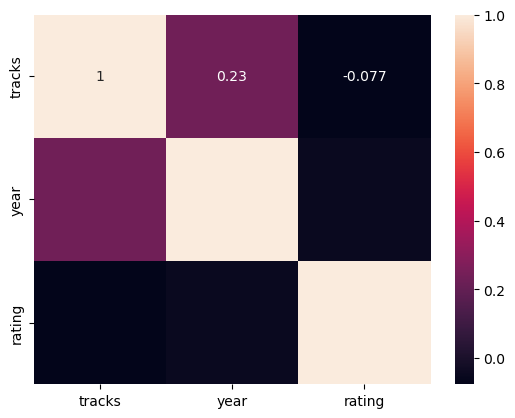

In [21]:
# correlation analysis
corr = df[numeric_cols].corr()
sns.heatmap(corr , annot = True);

- the number of tracks in a album have a small correlation to the rating of the album


In [22]:
df.duplicated().sum() # number of duplicates in the dataset

534

In [23]:
# understanding the duplicates
print(df.iloc[3022])
print(df.iloc[3019])
df.loc[df['project_name'] == 'jodeki']

project_name    jodeki
artist          tricot
project_type     album
tracks            12.0
year            2020.0
rating             7.0
Name: 3022, dtype: object
project_name       hiss
artist          wormrot
project_type      album
tracks             21.0
year             2022.0
rating              8.0
Name: 3019, dtype: object


,project_name,artist,project_type,tracks,year,rating
2714,jodeki,tricot,album,12.0,2020.0,7.0
2805,jodeki,tricot,album,2.0,2018.0,7.0
2810,jodeki,tricot,album,2.0,2018.0,7.0
2936,jodeki,tricot,album,12.0,2020.0,7.0
3022,jodeki,tricot,album,12.0,2020.0,7.0


In [24]:
df = df.drop_duplicates() # remove duplicates from the dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2490 entries, 0 to 3023
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  2490 non-null   object 
 1   artist        2490 non-null   object 
 2   project_type  2490 non-null   object 
 3   tracks        2490 non-null   float64
 4   year          2490 non-null   float64
 5   rating        2490 non-null   float64
dtypes: float64(3), object(3)
memory usage: 136.2+ KB


In [33]:
# turn float64 into float16 for better memory usage
df['rating']= df['rating'].astype('float32')
df['year']= df['year'].astype('float32')
df['tracks']= df['tracks'].astype('float32')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2490 entries, 0 to 3023
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  2490 non-null   object 
 1   artist        2490 non-null   object 
 2   project_type  2490 non-null   object 
 3   tracks        2490 non-null   float16
 4   year          2490 non-null   float16
 5   rating        2490 non-null   float16
dtypes: float16(3), object(3)
memory usage: 92.4+ KB


In [28]:
# null values from each columns
df.isnull().sum()

project_name    0
artist          0
project_type    0
tracks          0
year            0
rating          0
dtype: int64

In [29]:
df[numeric_cols].skew()

/Users/pouniq/anaconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1252: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
/Users/pouniq/anaconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1251: RuntimeWarning: overflow encountered in square
  adjusted2 = adjusted**2


tracks         inf
year           NaN
rating   -0.787598
dtype: float16

In [30]:
df.columns

Index(['project_name', 'artist', 'project_type', 'tracks', 'year', 'rating'], dtype='object')

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

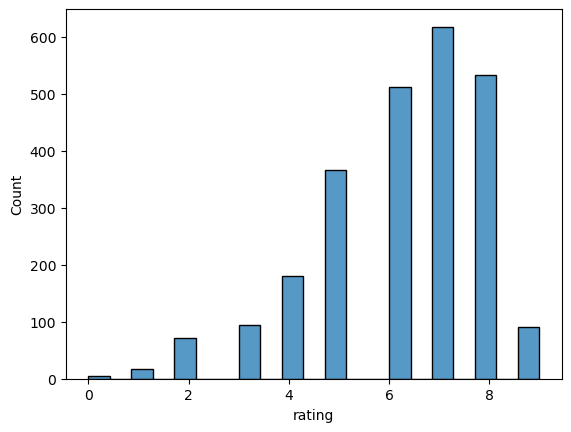

In [34]:
# the skewness of the 'rating' columns
sns.histplot(df['rating'])

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


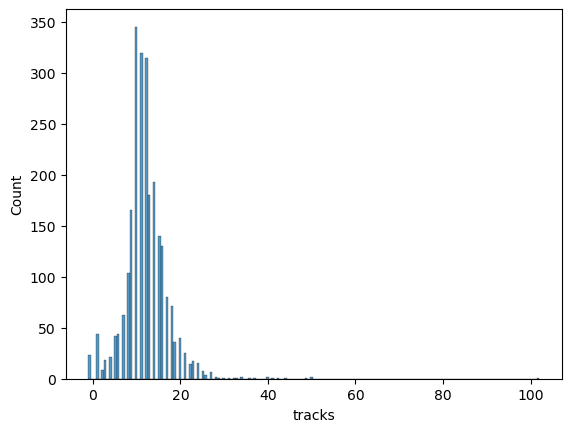

In [36]:
#the skewness of the 'tracks' column
sns.histplot(df['tracks']);

In [37]:
df.loc[df['tracks'] > 40]

,project_name,artist,project_type,tracks,year,rating
121,shit computer,kids & explosions,album,102.0,2016.0,8.0
771,self-titled,quakers,album,41.0,2012.0,5.0
1301,third side of tape,lil ugly mane,album,50.0,2015.0,8.0
1838,50 song memoir,the magnetic fields,album,50.0,2017.0,7.0
1839,pharma,nmesh,album,42.0,2017.0,7.0
2408,the consuming flame: open exercises in group form,matmos,album,44.0,2020.0,8.0
2446,7g,a. g. cook,album,49.0,2020.0,6.0


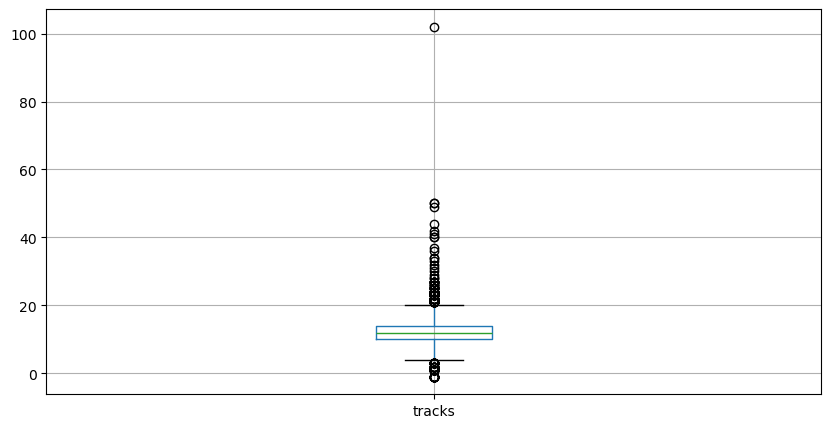

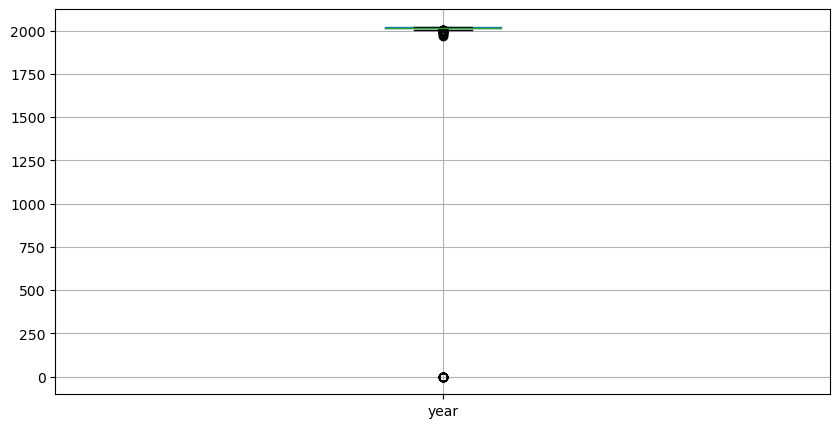

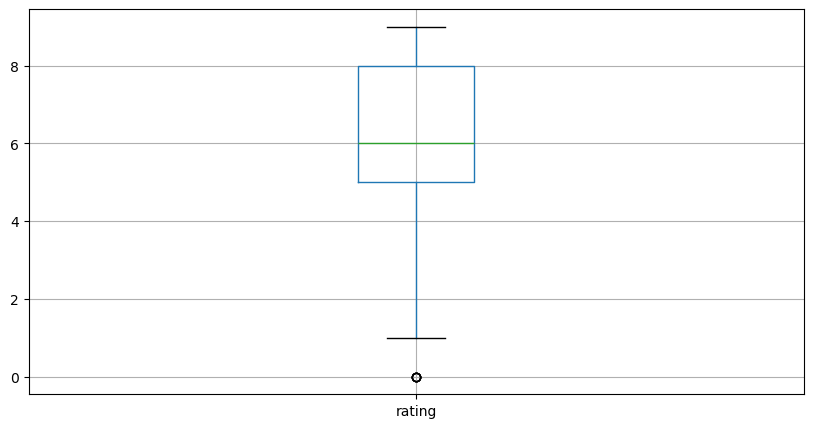

In [38]:
# handling outliers
for column in numeric_cols:
  plt.figure(figsize=(10,5))
  df.boxplot([column])

In [39]:
# when the rate of the album is zero
df.loc[df['rating'] == 0]

,project_name,artist,project_type,tracks,year,rating
1187,all love's legal,planningtorock,album,12.0,2013.0,0.0
2081,the big day,chance the rapper,album,22.0,2019.0,0.0
2279,father of all...,green day,album,10.0,2020.0,0.0
2486,welcome to the madhouse,tones and i,album,20.0,2021.0,0.0
2688,x,ken carson,album,20.0,2022.0,0.0


In [40]:
# something is off here we have year and tracks that are -1
YOut = df.loc[df['year'] < 5]
# make a copy of the dataset
YOut = YOut.copy()

In [41]:
# list of the values we need
year_list = [2010, 2016, 2017, 2011, 2015, 2013, 2022, 2013, 2017, 2014, 2015, 2016, 2016, 2018, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021]
tracks_list = [1, 10, 1, 15, 10, 12, 12, 14, 6, 14, 10, 8, 14, 3, 9, 11, 'Various', 10, 7, 14, 10, 10, 14]

In [42]:
YOut

,project_name,artist,project_type,tracks,year,rating
68,usa boys,health,album,-1.0,-1.0,8.0
139,you and i,washed out,track,-1.0,-1.0,9.0
179,where i'm going,cut copy,track,-1.0,-1.0,6.0
579,brand new wayo compilation,various artists,album,-1.0,-1.0,7.0
816,in the middle of infinity,3:33,album,-1.0,-1.0,2.0
900,kismet,mr. muthafuckin' exquire,mixtape,-1.0,-1.0,7.0
979,parasite brain,soupcans,ep,-1.0,-1.0,7.0
988,nostalgic 64,denzel curry,album,-1.0,-1.0,7.0
1206,biggie apple ep /,pearls negras,mixtape,-1.0,-1.0,8.0
1209,self-titled,i am your destruction,album,-1.0,-1.0,7.0


In [43]:
# putting the values into the copied dataset
YOut.loc[:, 'year'] = year_list
YOut.loc[:, 'tracks'] = tracks_list
df.update(YOut)
df = df.drop(2601) # this album is weird have multiple albums in one album so we dont consider that

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2489 entries, 0 to 3023
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  2489 non-null   object 
 1   artist        2489 non-null   object 
 2   project_type  2489 non-null   object 
 3   tracks        2489 non-null   object 
 4   year          2489 non-null   float32
 5   rating        2489 non-null   float32
dtypes: float32(2), object(4)
memory usage: 116.7+ KB


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2489 entries, 0 to 3023
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  2489 non-null   object 
 1   artist        2489 non-null   object 
 2   project_type  2489 non-null   object 
 3   tracks        2489 non-null   object 
 4   year          2489 non-null   float32
 5   rating        2489 non-null   float32
dtypes: float32(2), object(4)
memory usage: 116.7+ KB


In [46]:
df.loc[df['tracks'] == 'Various']

,project_name,artist,project_type,tracks,year,rating


In [47]:
df['tracks'] = df['tracks'].astype('float16')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2489 entries, 0 to 3023
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  2489 non-null   object 
 1   artist        2489 non-null   object 
 2   project_type  2489 non-null   object 
 3   tracks        2489 non-null   float16
 4   year          2489 non-null   float32
 5   rating        2489 non-null   float32
dtypes: float16(1), float32(2), object(3)
memory usage: 102.1+ KB


<Axes: >

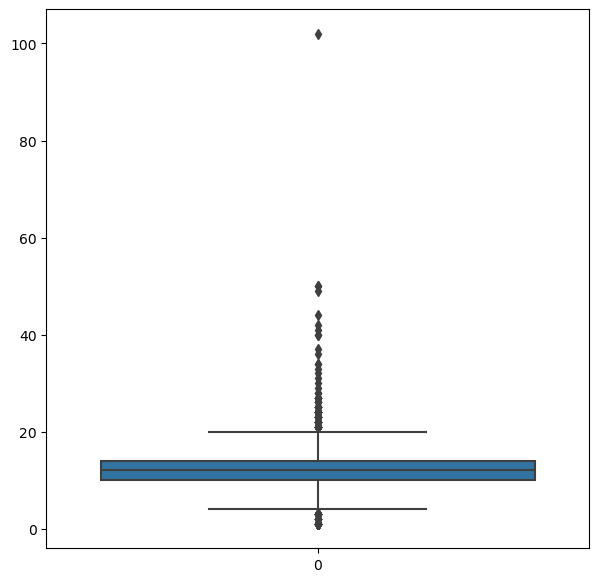

In [49]:
plt.figure(figsize=(7,7))
sns.boxplot(df['tracks'])

In [50]:
df = df.drop(121)

In [51]:
df

,project_name,artist,project_type,tracks,year,rating
0,all day,girl talk,album,14.0,2008.0,8.0
1,my beautiful dark twisted fantasy,kanye west,album,13.0,2010.0,6.0
2,scary monsters and nice sprites,skrillex,ep,9.0,2010.0,7.0
3,broken bells,broken bells,ep,10.0,2010.0,5.0
4,bastard,"tyler, the creator",album,12.0,2019.0,7.0
...,...,...,...,...,...,...
2890,aethiopes,billy woods,album,13.0,2022.0,8.0
2891,you belong there,daniel rossen,album,10.0,2022.0,8.0
2892,"peace ""fly"" god",westside gunn,mixtape,10.0,2022.0,5.0
2893,god's country,chat pile,album,9.0,2022.0,8.0


In [53]:
# reset the index column
df.reset_index(inplace=True)
df = df.drop([ 'index'] , axis = 1)

In [54]:
df['project_type'].unique() # identify the types of project

array(['album', 'ep', 'track', 'mixtape', 'redux'], dtype=object)

In [55]:
# calculate IQR for column tracks
Q1 = df['tracks'].quantile(0.25)
Q3 = df['tracks'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliersT = df[(df['tracks'] > Q3 + threshold * IQR)]
outliersT

,level_0,project_name,artist,project_type,tracks,year,rating
131,131,oj simpson,guilty simpson,album,24.0,2010.0,6.0
164,164,afro-beat airways,various artists,album,24.0,2015.0,8.0
171,171,i love you tonite,bare wires,track,23.0,1968.0,7.0
178,178,sports,weekend,album,28.0,1991.0,8.0
206,206,"hurry up, we're dreaming",m83,album,22.0,2011.0,4.0
...,...,...,...,...,...,...,...
2384,2384,whole lotta red,playboi carti,redux,24.0,2020.0,5.0
2417,2417,shunka ryougen,haru nemuri,album,21.0,2022.0,7.0
2472,2472,before sh!t got weird,the cool kids,album,21.0,2022.0,7.0
2474,2474,un verano sin ti,bad bunny,album,23.0,2022.0,6.0


In [56]:
# calculate IQR for column year
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
outliersY = df[(df['year'] < Q1 - threshold * IQR) | (df['year'] > Q3 + threshold * IQR)]
outliersY

,level_0,project_name,artist,project_type,tracks,year,rating
18,18,raw power,iggy and the stooges,album,8.0,1973.0,5.0
69,69,tsol,shad,album,10.0,2001.0,6.0
103,103,discoverer,r.e.m.,track,12.0,2001.0,6.0
124,124,lights,interpol,track,11.0,2002.0,5.0
171,171,i love you tonite,bare wires,track,23.0,1968.0,7.0
176,176,2 forms of anger,brian eno,track,12.0,1983.0,7.0
178,178,sports,weekend,album,28.0,1991.0,8.0
191,191,the spits,the spits,album,9.0,2002.0,2.0
702,702,self-titled,comadre,album,15.0,1999.0,8.0
742,742,dorner vs. tookie compilation,hellfyre club,album,10.0,1999.0,7.0


In [57]:
# choose to exculde the outliers because
df = df.drop(outliers.index)